In [ ]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import glob
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
from utils import *

In [ ]:
limit_mem()

In [ ]:
def to_plot(img):
    return np.rollaxis(img, 0, 3).astype(np.uint8)
def plot(img):
    plt.imshow((img))

## is it work

In [9]:
% cd /mnt/vidme/vid1

/mnt/vidme/vid1


In [17]:
path='/mnt/vidme/vid1/'
yolo_path='/mnt/darknet/'
g=glob.glob('*.*')

In [24]:
% cd /mnt/darknet/

/mnt/darknet


In [47]:

def run_yolo(i):
    subprocess.check_output(['/mnt/darknet/darknet','detect','cfg/yolo.cfg','cfg/yolo.weights',path+'out'+str(i)+'.png'])


In [46]:
pic_nums

array([396])

# of people 4


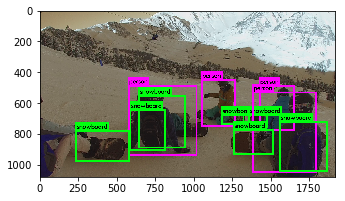

In [45]:
import subprocess
fig = plt.figure( figsize=(18, 18))

pic_nums=np.random.choice(1000,1)
j=1
for i in (pic_nums):
    z = fig.add_subplot(3,3,j)
    run_yolo(i)
    try:
        df=pd.read_csv('output.txt',header=None)
        df.columns=['object','conf','left','right','top','bottom']
        person_count=len(df[df.object=='person'])
    except:
        person_count=0
    print ('# of people',person_count)
    im=cv2.imread(yolo_path+'predictions.png')
    plot(im)
    j+=1
plt.imshow(im)

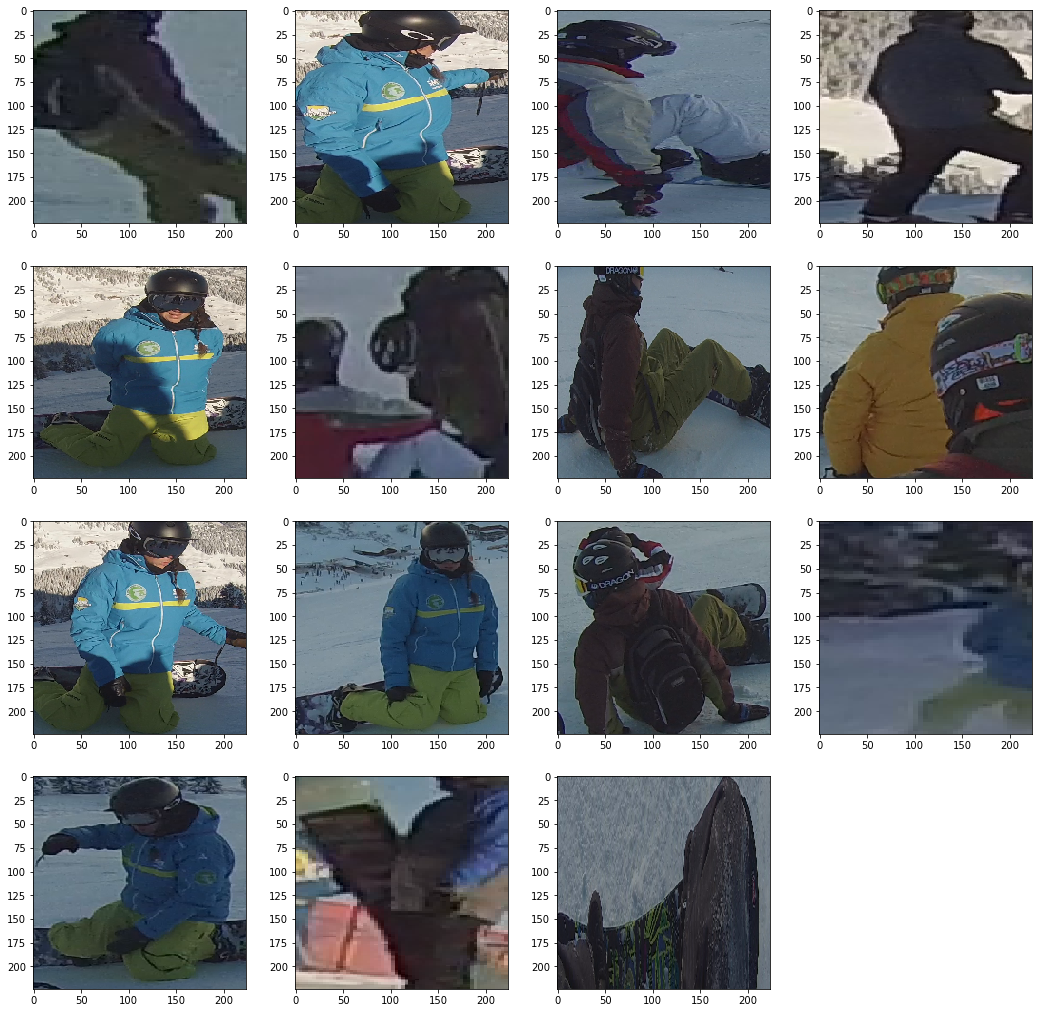

In [85]:
fig = plt.figure( figsize=(18, 18))
for i in (range(1,16)):
    im=Image.fromarray(np.uint8(person_img_array[i]))
    z = fig.add_subplot(4,4,i)
    plot(im)
    #j+=1
plt.imshow(im)

In [49]:
import subprocess

In [54]:
%cd /home/ubuntu/Notebooks/yolo/darknet/

/home/ubuntu/Notebooks/yolo/darknet


In [81]:
path+'out'+str(i)+'.png'

'/datadrive/vidme/out750.png'

In [82]:
#it works even though error
try:
    a=subprocess.check_output(['./darknet','detect','cfg/yolo.cfg','yolo.weights',path+'out'+str(i)+'.png'])
except:
    pass

In [ ]:
IGNmZy95b2xvLmNmZyB5b2xvLndlaWdodHMgL2RhdGFkcml2ZS92aWRtZS9vdXQxLnBu                                     │

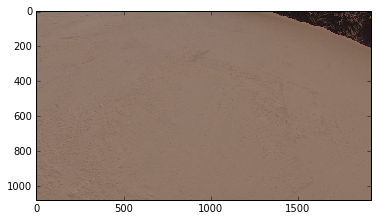

In [83]:
yolo_path='/home/ubuntu/Notebooks/yolo/darknet/'
im=cv2.imread(yolo_path+'predictions.jpg')
plot(im)

In [ ]:
#todo: get bounding boxes

In [5]:
% cd /datadrive/vidme/

/datadrive/vidme


In [7]:
path='/datadrive/vidme/'

## Run VGG on images

In [ ]:
from keras.applications import vgg16
from PIL import Image

In [7]:
model=vgg16.VGG16()

In [51]:
% cd /mnt/vidme/vid1/
g=glob.glob('*.png')
pics=np.random.choice(g,len(g),replace=False)

/mnt/vidme/vid1


In [8]:
% cd /mnt/vidme/vid1/persons
person_files=glob.glob('*.png')
person_pics=np.random.choice(person_files,len(person_files),replace=False)

/mnt/vidme/vid1/persons


In [11]:
# read images and resize
imgs=[]
for file in person_files:
    img=np.array(Image.open(file))
    img.resize(224,224,3)
    imgs.append(img)
person_img_array=np.array(imgs)

In [12]:
predictions=model.predict(person_img_array,batch_size=16)

In [13]:
predictions.shape

(1778, 1000)

In [18]:
np.argsort(predictions[3])

array([857, 860, 550, 687,  95, 798, 368, 685, 451, 490,  24, 906, 777,
       878, 993, 335, 648, 453, 926, 986, ..., 915, 412,   6, 296,   4,
       150, 646, 979, 976, 999, 112, 107, 913, 700,  34, 970, 701, 977,
       978, 728])

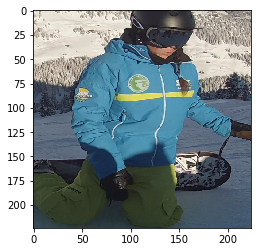

In [34]:
show_img(9)

In [47]:
from IPython.display import display,clear_output
from ipywidgets import widgets

text=widgets.Text()

In [ ]:
img = Image.open('/mnt/vidme/vid1/persons/resized'+str(i)+'.png')
plot(img)
plt.show()

In [40]:
np.random.choice(1778)

67

In [39]:
import pandas as pd

In [52]:
categories=np.zeros(1778)

In [73]:
rel_cats=categories[np.where(categories!=0)]
rel_preds=predictions[np.where(categories!=0)]

In [87]:
def handle_submit(sender):
    global id
    df=pd.read_csv('tags.csv')
    clear_output()
    print(text.value)
    #categories[id]=text.value
    if id not in df.id.values:
        df=df.append(pd.DataFrame({'id':[id],'tag':[text.value]}))
        #print (df)
    i=int(text.value)
    id=np.random.choice(1778)
    show_img(id)
    df.to_csv('tags.csv',index=False)
    

def show_img(num):
    img=Image.fromarray(np.uint8(person_img_array[num]))
    plot(img)
    plt.show()

In [63]:
cd ~/nbs/vidme/

/home/ubuntu/nbs/vidme


In [82]:
df=pd.DataFrame({'id':[],'tag':[]})
df.to_csv('tags.csv',index=False)
df

,id,tag


In [88]:
df=pd.read_csv('tags.csv')
df

,id,tag
0,1182.0,4
1,689.0,2
2,1714.0,2
3,1174.0,6
4,1644.0,7
5,1734.0,6
6,289.0,6


In [ ]:
people={1:'wendy',2:'gidi',3:'shimshi',4:'elad',5:'white_pants'\
       ,6:'green_suite',7:'random',0:'false'}

2


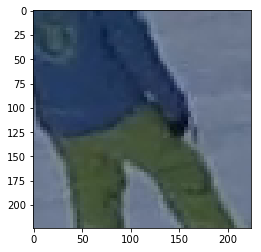

In [113]:
# text=widgets.Text()
display(text)
num=0


text.on_submit(handle_submit)
num=np.random.choice(1778)
show_img(num)

In [126]:
df

,id,tag
0,689.0,2
1,1714.0,2
2,1174.0,6
3,1644.0,7
4,1734.0,6
5,289.0,6
6,215.0,1
7,262.0,0
8,1397.0,1
9,177.0,1


In [72]:
#build upper models
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(1000, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='sigmoid'))

In [ ]:
#train upper model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## image clustering

In [125]:
df=pd.read_csv('tags.csv')

In [121]:
df.id.astype(int).unique()

array([ 689, 1714, 1174, 1644, 1734,  289,  215,  262, 1397,  177, 1302,
        832, 1554,  668, 1231, 1470,  734,  846, 1099, 1624,  771,  903,
       1404, 1709, 1575, 1152, 1735,  622,  739,  263,   25, 1432, 1764,
        361,  813,  118, 1293, 1472, 1436,  856, 1442,  775, 1421, 1441,
         61,   33])

In [122]:
df.tag.values

array([2, 2, 6, 7, 6, 6, 1, 0, 1, 1, 2, 2, 4, 4, 6, 6, 1, 1, 2, 2, 2, 2, 0,
       0, 7, 7, 4, 4, 6, 6, 3, 3, 2, 2, 6, 6, 1, 1, 0, 0, 4, 4, 6, 6, 7, 7])

In [123]:
np.array(labels)[df.id.astype(int).values]

array([7, 3, 4, 7, 1, 3, 1, 4, 4, 4, 0, 4, 3, 4, 0, 5, 4, 2, 2, 7, 3, 7, 4,
       7, 5, 5, 4, 7, 4, 4, 7, 4, 8, 7, 2, 3, 7, 4, 4, 7, 4, 4, 7, 1, 6, 7], dtype=int32)

In [124]:
metrics.adjusted_rand_score(np.array(labels)[df.id.astype(int).values], df.tag.values)  

-0.0083081206735236609

In [36]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(predictions)
labels=kmeans.labels_

In [37]:
from collections import Counter
Counter(labels)

Counter({0: 92,
         1: 72,
         2: 202,
         3: 81,
         4: 729,
         5: 78,
         6: 82,
         7: 367,
         8: 57,
         9: 18})

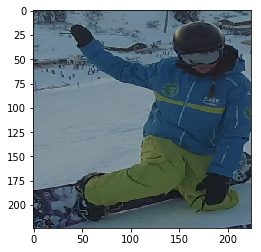

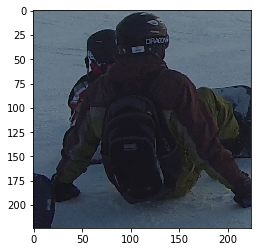

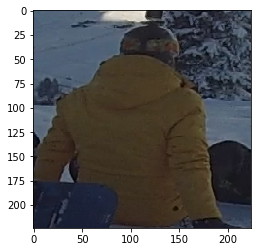

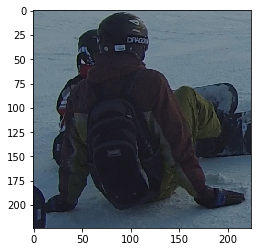

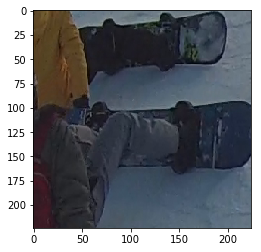

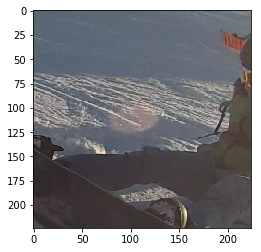

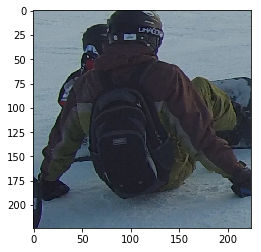

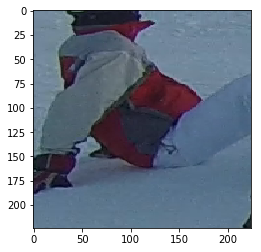

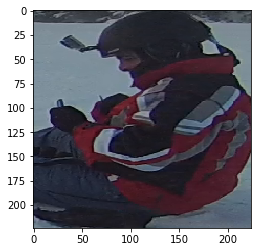

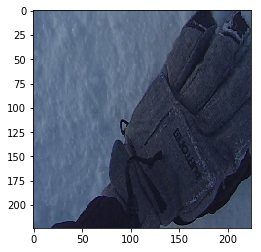

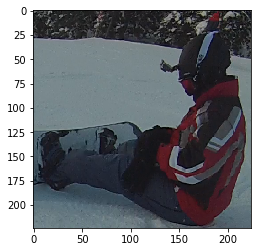

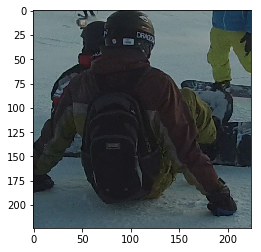

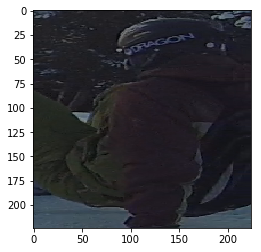

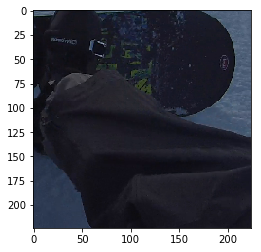

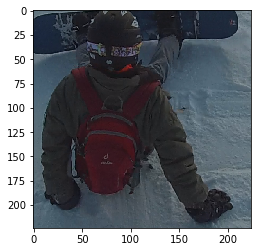

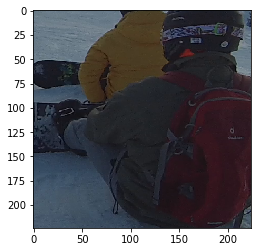

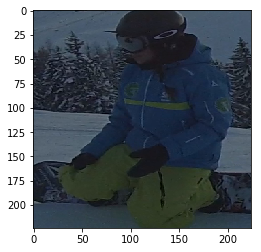

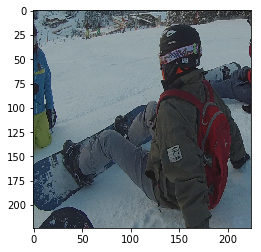

In [38]:
#show similar images
i=1
for i in np.where(labels==9)[0]:
    img = Image.open('/mnt/vidme/vid1/persons/resized'+str(i)+'.png')
    plot(img)
    plt.show()

/mnt/vidme/vid1/persons


NameError: name 'pd' is not defined

In [85]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
taggings['encoding']=le.fit_transform(taggings['person'])

In [102]:
from sklearn import metrics
enc=taggings.encoding
metrics.adjusted_rand_score(enc, labels)  

NameError: name 'taggings' is not defined

## kmeans by image features

In [28]:
ap.parse_args()

usage: __main__.py [-h] -i IMAGE -c CLUSTERS
__main__.py: error: the following arguments are required: -i/--image, -c/--clusters


SystemExit: 2

/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [26]:
?vars

In [25]:
#http://www.pyimagesearch.com/2014/05/26/opencv-python-k-means-color-clustering/


# import the necessary packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
import utils
import cv2
 
# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required = True, help = "Path to the image")
ap.add_argument("-c", "--clusters", required = True, type = int,help = "# of clusters")
args = vars(ap.parse_args())
 
# load the image and convert it from BGR to RGB so that
# we can dispaly it with matplotlib
image = cv2.imread(args["image"])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 


NameError: name 'args' is not defined

In [69]:
person_pics

array(['resized961.png', 'resized552.png', 'resized1410.png', ...,
       'resized930.png', 'resized1532.png', 'resized584.png'], 
      dtype='<U15')

In [1]:
person_pics
# show our image
#very slow...
hist_list=[]
for i in range(len(person_pics)):
    image = cv2.imread('/mnt/vidme/vid1/persons/resized'+str(i)+'.png')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    clt = KMeans(n_clusters = 10)
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    clt.fit(image)
    hist = centroid_histogram(clt)
    hist_list.append(hist)

NameError: name 'person_pics' is not defined

In [ ]:
hist_array=np.array(hist_list[0].shape)

In [67]:

clt = KMeans(n_clusters = 10)
image = image.reshape((image.shape[0] * image.shape[1], 3))
clt.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

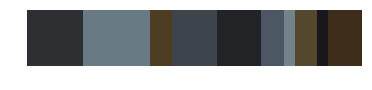

In [68]:
# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)
 
# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

In [62]:
len(hist)

5

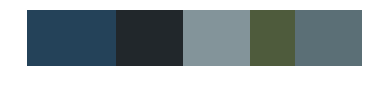

In [60]:
# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)
 
# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

In [34]:
# import the necessary packages
import numpy as np
import cv2

def centroid_histogram(clt):
	# grab the number of different clusters and create a histogram
	# based on the number of pixels assigned to each cluster
	numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
	(hist, _) = np.histogram(clt.labels_, bins = numLabels)

	# normalize the histogram, such that it sums to one
	hist = hist.astype("float")
	hist /= hist.sum()

	# return the histogram
	return hist

In [36]:
def plot_colors(hist, centroids):
	# initialize the bar chart representing the relative frequency
	# of each of the colors
	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0
 
	# loop over the percentage of each cluster and the color of
	# each cluster
	for (percent, color) in zip(hist, centroids):
		# plot the relative percentage of each cluster
		endX = startX + (percent * 300)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
			color.astype("uint8").tolist(), -1)
		startX = endX
	
	# return the bar chart
	return bar
